In [1]:
import pandas as pd
import numpy as np
import os
import sys
import random
from itertools import product
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


sys.path.extend([
    '../src',
    '../data',
    '../utils',
    '../plot'

])

from utils import run_nested_cv, create_sliding_windows, time_rf_inference_for_subject

if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("CPU")
    
seed_num = 42
random.seed(seed_num)
np.random.seed(seed_num)
tf.random.set_seed(seed_num)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

#data
left = pd.read_csv('../data/left.csv')
right = pd.read_csv('../data/right.csv')
affected = pd.read_csv('../data/affected.csv')
unaffected = pd.read_csv('../data/unaffected.csv')

right['limb'] = 1
left['limb'] = 2
affected['limb'] = 3
unaffected['limb'] = 4

affected['subject'] = affected['subject'] + 10
unaffected['subject'] = unaffected['subject'] + 10

combined = pd.concat([unaffected, 
                      affected, 
                      right, 
                      left], ignore_index=True)

architecture = {
               'num_filters': [50, 25],
               'filter_sizes': [5, 5],
               'pool_sizes': [5, 5]
               }

CPU


2025-07-04 08:06:41.049993: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


New best HP found: {'activation': 'relu', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x33a90cbb0>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x33a90c070>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x179af25e0>, 'optimizer': 'nadam'} with score: 0.315
New best HP found: {'activation': 'relu', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x33a90cbb0>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x33a90c070>, 'learning_rate': 0.0001, 'loss': <function mean_absolute_error at 0x179af28b0>, 'optimizer': 'nadam'} with score: 0.323
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x33a90cbb0>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x33a90c070>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x179af25e0>, 'optimi

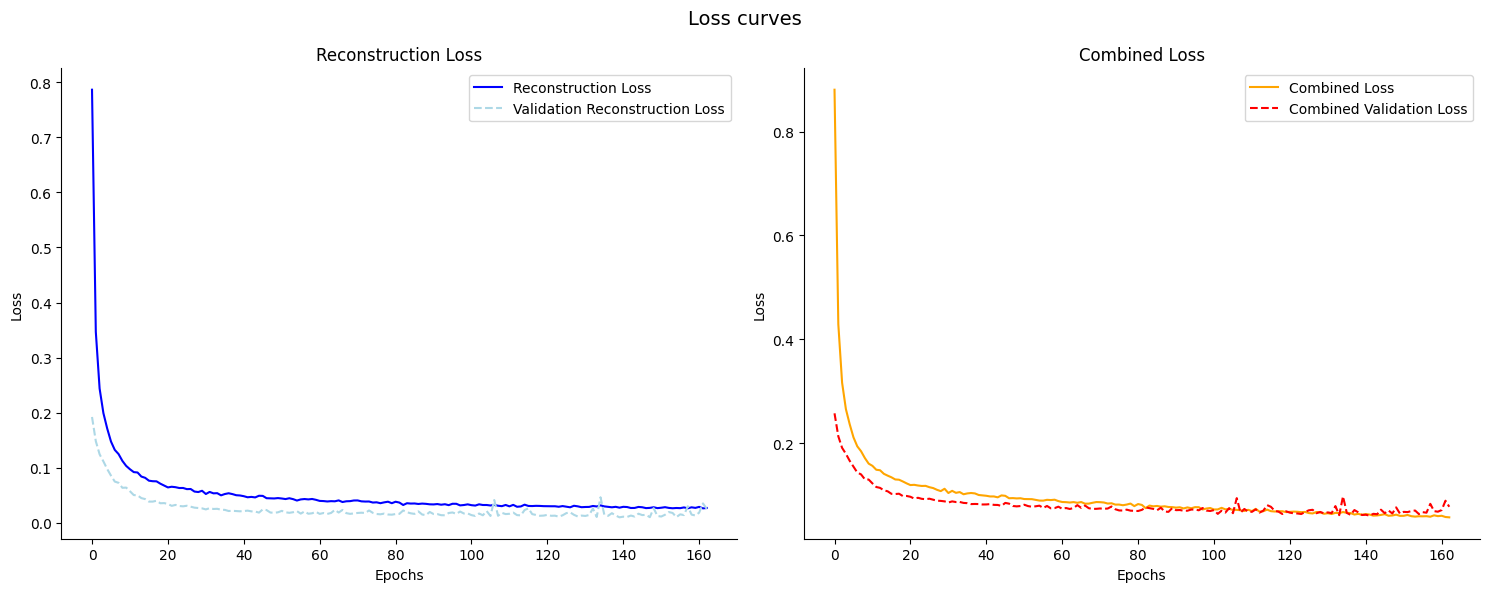

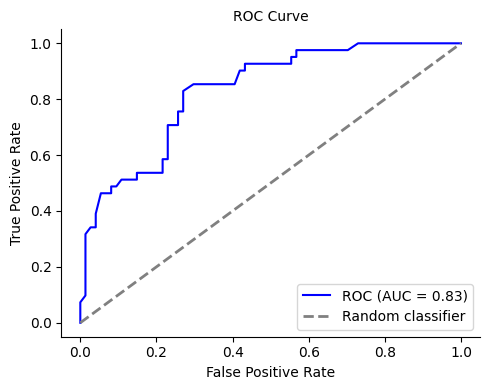

Limb: 3 Subject: 11 Youden Index: 0.428806855636124 Sensitivity: 0.6585365853658537 Specificity: 0.7702702702702703
New best HP found: {'activation': 'relu', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x33a90cbb0>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x33a90c070>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x179af25e0>, 'optimizer': 'nadam'} with score: 0.504
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x33a90cbb0>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x33a90c070>, 'learning_rate': 0.0001, 'loss': <function mean_absolute_error at 0x179af28b0>, 'optimizer': 'nadam'} with score: 0.505


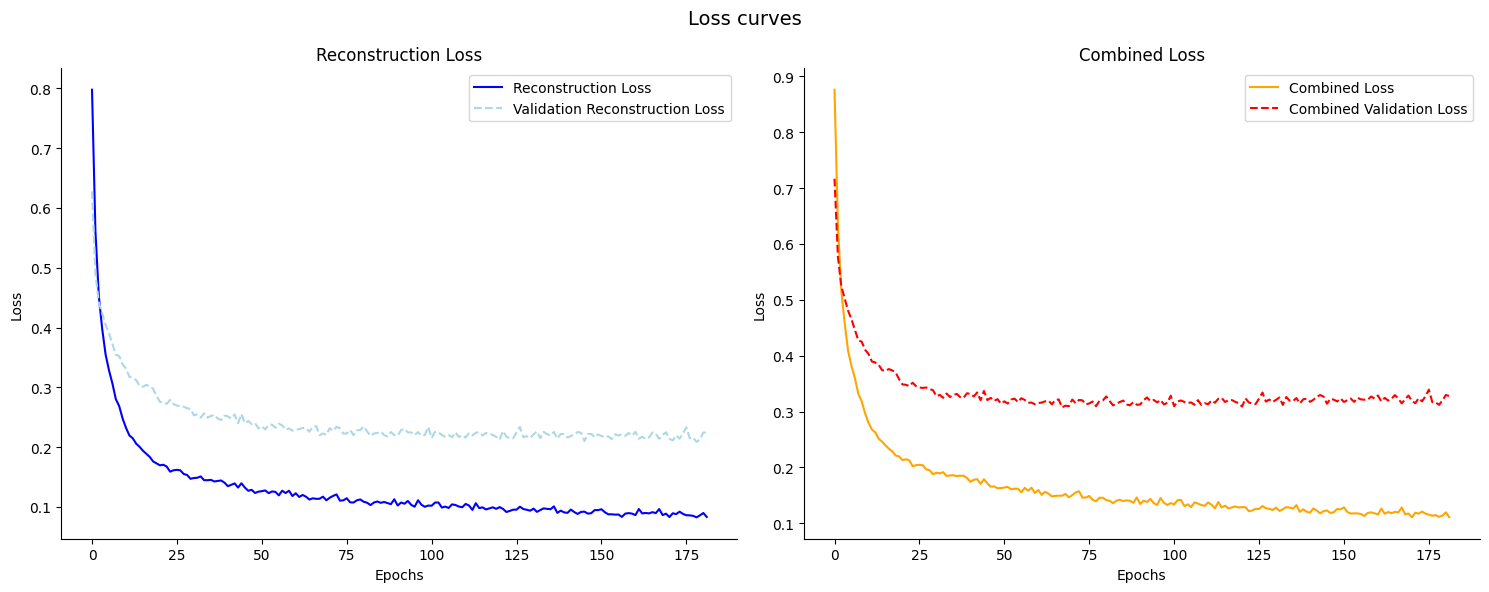

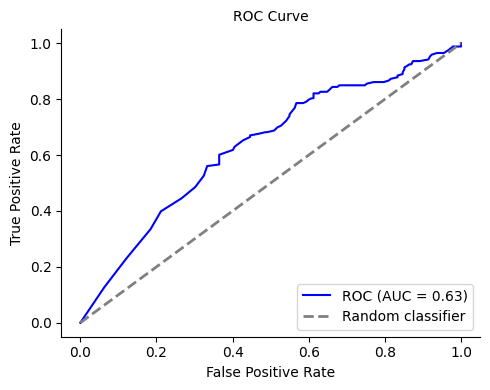

Limb: 3 Subject: 12 Youden Index: 0.12448575743373436 Sensitivity: 0.8497109826589595 Specificity: 0.2747747747747748
New best HP found: {'activation': 'relu', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x33a90cbb0>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x33a90c070>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x179af25e0>, 'optimizer': 'nadam'} with score: 0.230
New best HP found: {'activation': 'relu', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x33a90cbb0>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x33a90c070>, 'learning_rate': 0.0001, 'loss': <function mean_absolute_error at 0x179af28b0>, 'optimizer': 'nadam'} with score: 0.293
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x33a90cbb0>, 'kernel_init': <keras.initializers.initializers_v2.H

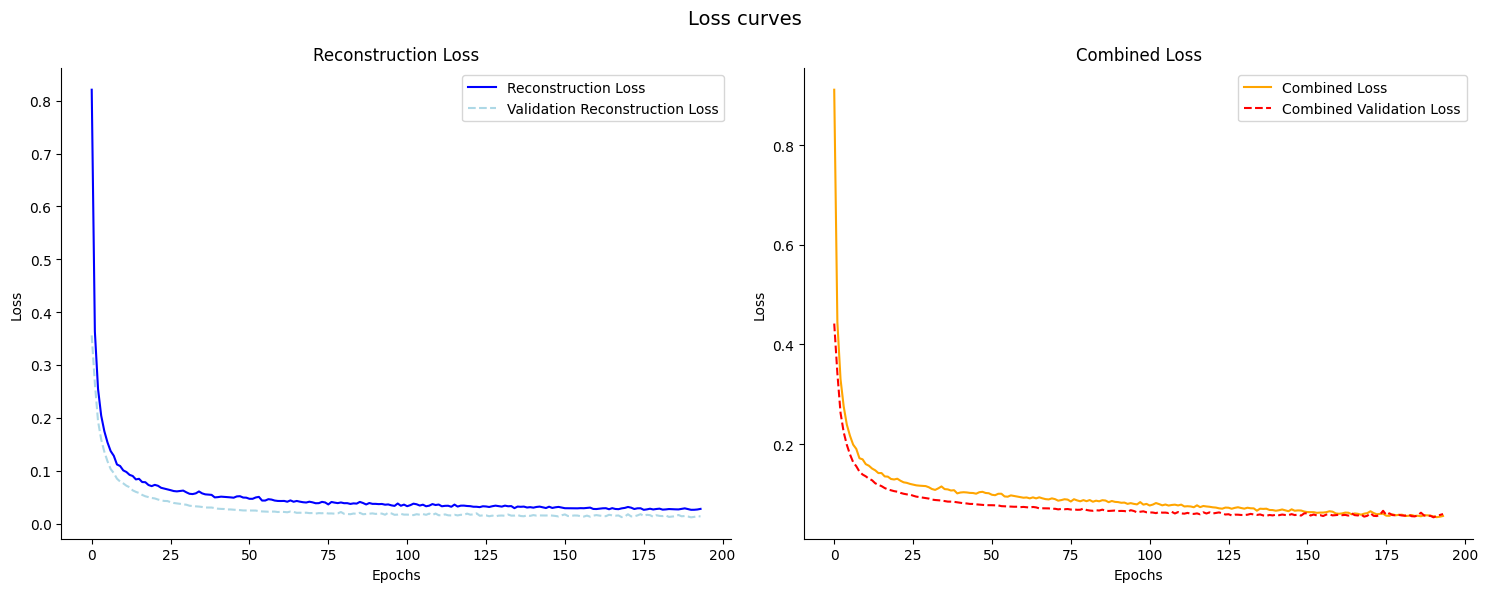

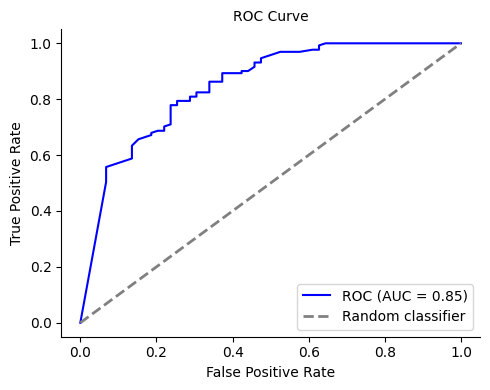

Limb: 3 Subject: 13 Youden Index: 0.4930780178548324 Sensitivity: 0.8320610687022901 Specificity: 0.6610169491525424
New best HP found: {'activation': 'relu', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x33a90cbb0>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x33a90c070>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x179af25e0>, 'optimizer': 'nadam'} with score: 0.427


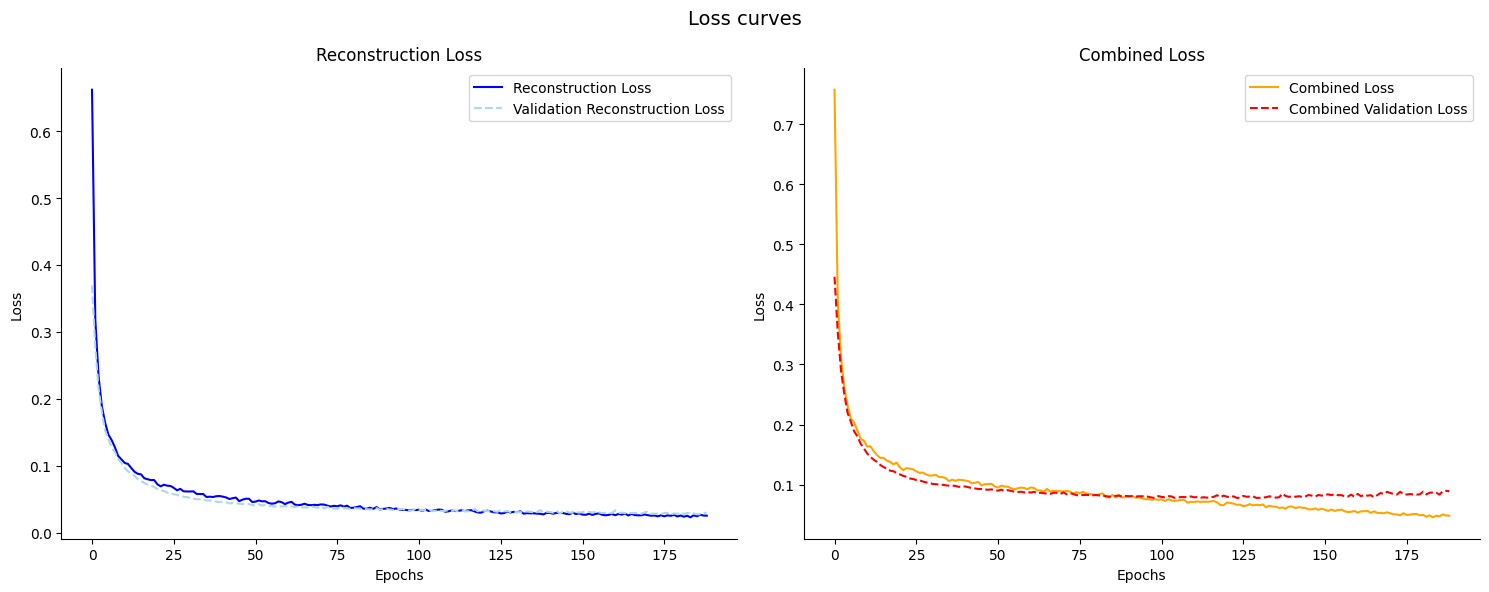

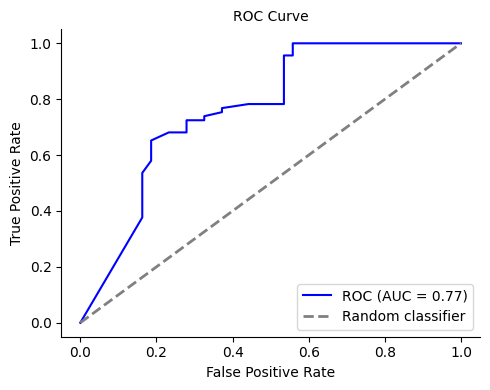

Limb: 3 Subject: 14 Youden Index: 0.3056959892146949 Sensitivity: 0.8405797101449275 Specificity: 0.46511627906976744
New best HP found: {'activation': 'relu', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x33a90cbb0>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x33a90c070>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x179af25e0>, 'optimizer': 'nadam'} with score: 0.330


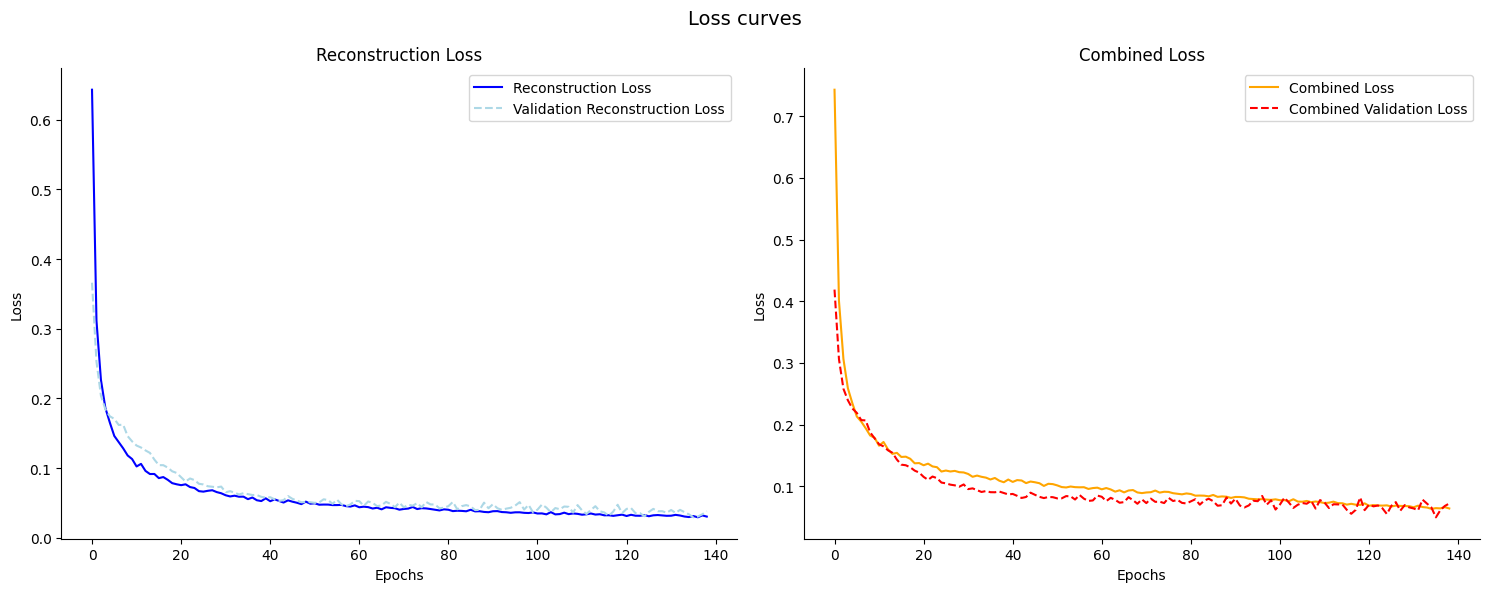

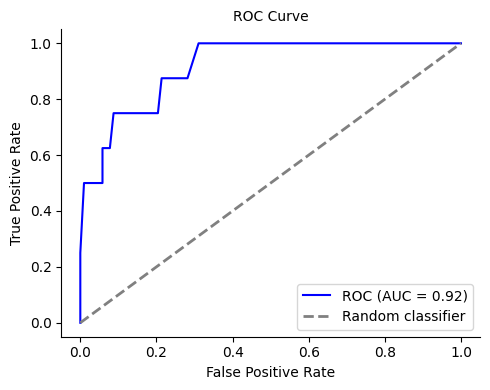

Limb: 3 Subject: 15 Youden Index: 0.633495145631068 Sensitivity: 0.75 Specificity: 0.883495145631068
0.3971123531540907 0.1724952098802881


In [2]:
approach = 1
filename = f'../results/approach1/limb_nested_cv_aff.csv'

window_size = 100
epochs = 200
batch_size = 32

#For approach1, supervised (class_loss = True), unsupervised (class_loss = False)
class_loss = True
plot_hist = True

X = affected[['ax', 'ay', 'az']]
y = affected['gnd']
subjects = affected['subject']
limbs = affected['limb']

hp_grid = {
            'activation': ['relu', 'tanh'],
            'kernel_init': [tf.keras.initializers.HeNormal(seed=42),],
            'bias_init': [tf.keras.initializers.Zeros()],
            'optimizer': ['nadam'],
            'loss': [tf.keras.losses.mean_squared_error,
                     tf.keras.losses.mean_absolute_error],
            'learning_rate': [0.0001],
            'batch_norm': [True],
          } 

results_df, model, encoder, rf_model = run_nested_cv(window_size=window_size,
                           X=X,
                           y=y,
                           subjects=subjects,
                           limbs=limbs,
                           architecture=architecture,
                           hp_grid=hp_grid,
                           epochs=epochs,
                           batch_size=batch_size,
                           class_loss=class_loss,
                           plot_hist=plot_hist,
                           approach=approach)

print(np.mean(results_df['youden_index']), np.std(results_df['youden_index']))

In [3]:

s_times = []

for i in subjects.unique():
    subject_n = i
    y_test_w, y_pred_w, subj_ids_w, limb_ids_w, time_taken = time_rf_inference_for_subject(subject_n, 
                                                                                           X, 
                                                                                           y, 
                                                                                           subjects, 
                                                                                           limbs, 
                                                                                           encoder, 
                                                                                           rf_model, 
                                                                                           window_size)
    
    s_times.append(time_taken)

print(f"Average inference time for subjects {subjects.unique()}: {np.mean(s_times)} seconds")


Average inference time for subjects [11 12 13 14 15]: 0.07730937004089355 seconds


In [4]:
print(results_df[['subject', 'youden_index']])
print(f"Mean Youden Index:{np.mean(results_df['youden_index'])}")

   subject  youden_index
0       11      0.428807
1       12      0.124486
2       13      0.493078
3       14      0.305696
4       15      0.633495
Mean Youden Index:0.3971123531540907


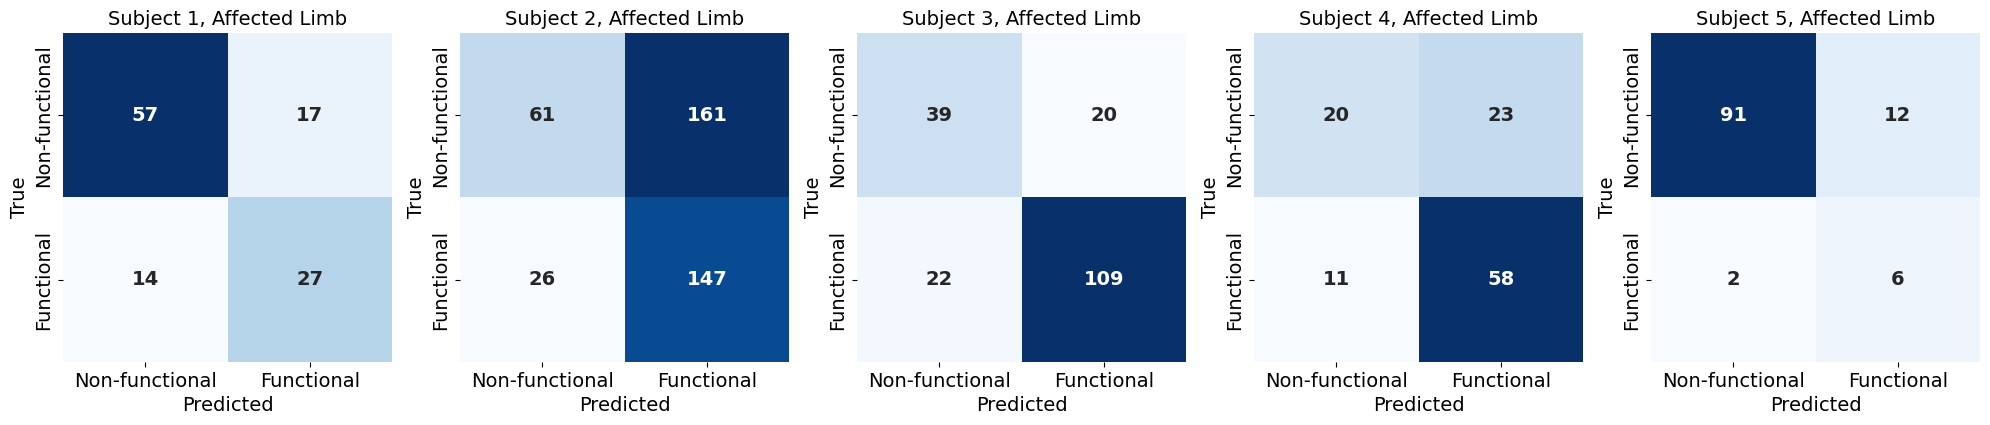

In [5]:
from plot import plot_confusion_matrix
cm = results_df['confusion_matrix']
plot_confusion_matrix(cm, limb = "Affected")